In [1]:
from school_analysis.preprocessing.load import Loader
import pandas as pd


loader = Loader()
df_melted = loader.load('graduates')
df_melted['year'] = pd.to_datetime(df_melted['year'], format='%Y')
df_melted['total'] = pd.to_numeric(df_melted['total'], errors='coerce')
total_students_by_year = df_melted.groupby('year')['total'].sum()

children_state = loader.load('school-children-by-state')
children_state = children_state.rename(columns={'Year': 'year'})
children_state['year'] = pd.to_datetime(children_state['year'], format='%Y')
child_amount_per_year = children_state.groupby('year')['Value'].sum()

merged_df = pd.merge(total_students_by_year, child_amount_per_year, on='year')
merged_df['relative'] = merged_df['total']/merged_df['Value'] 



KeyboardInterrupt: 

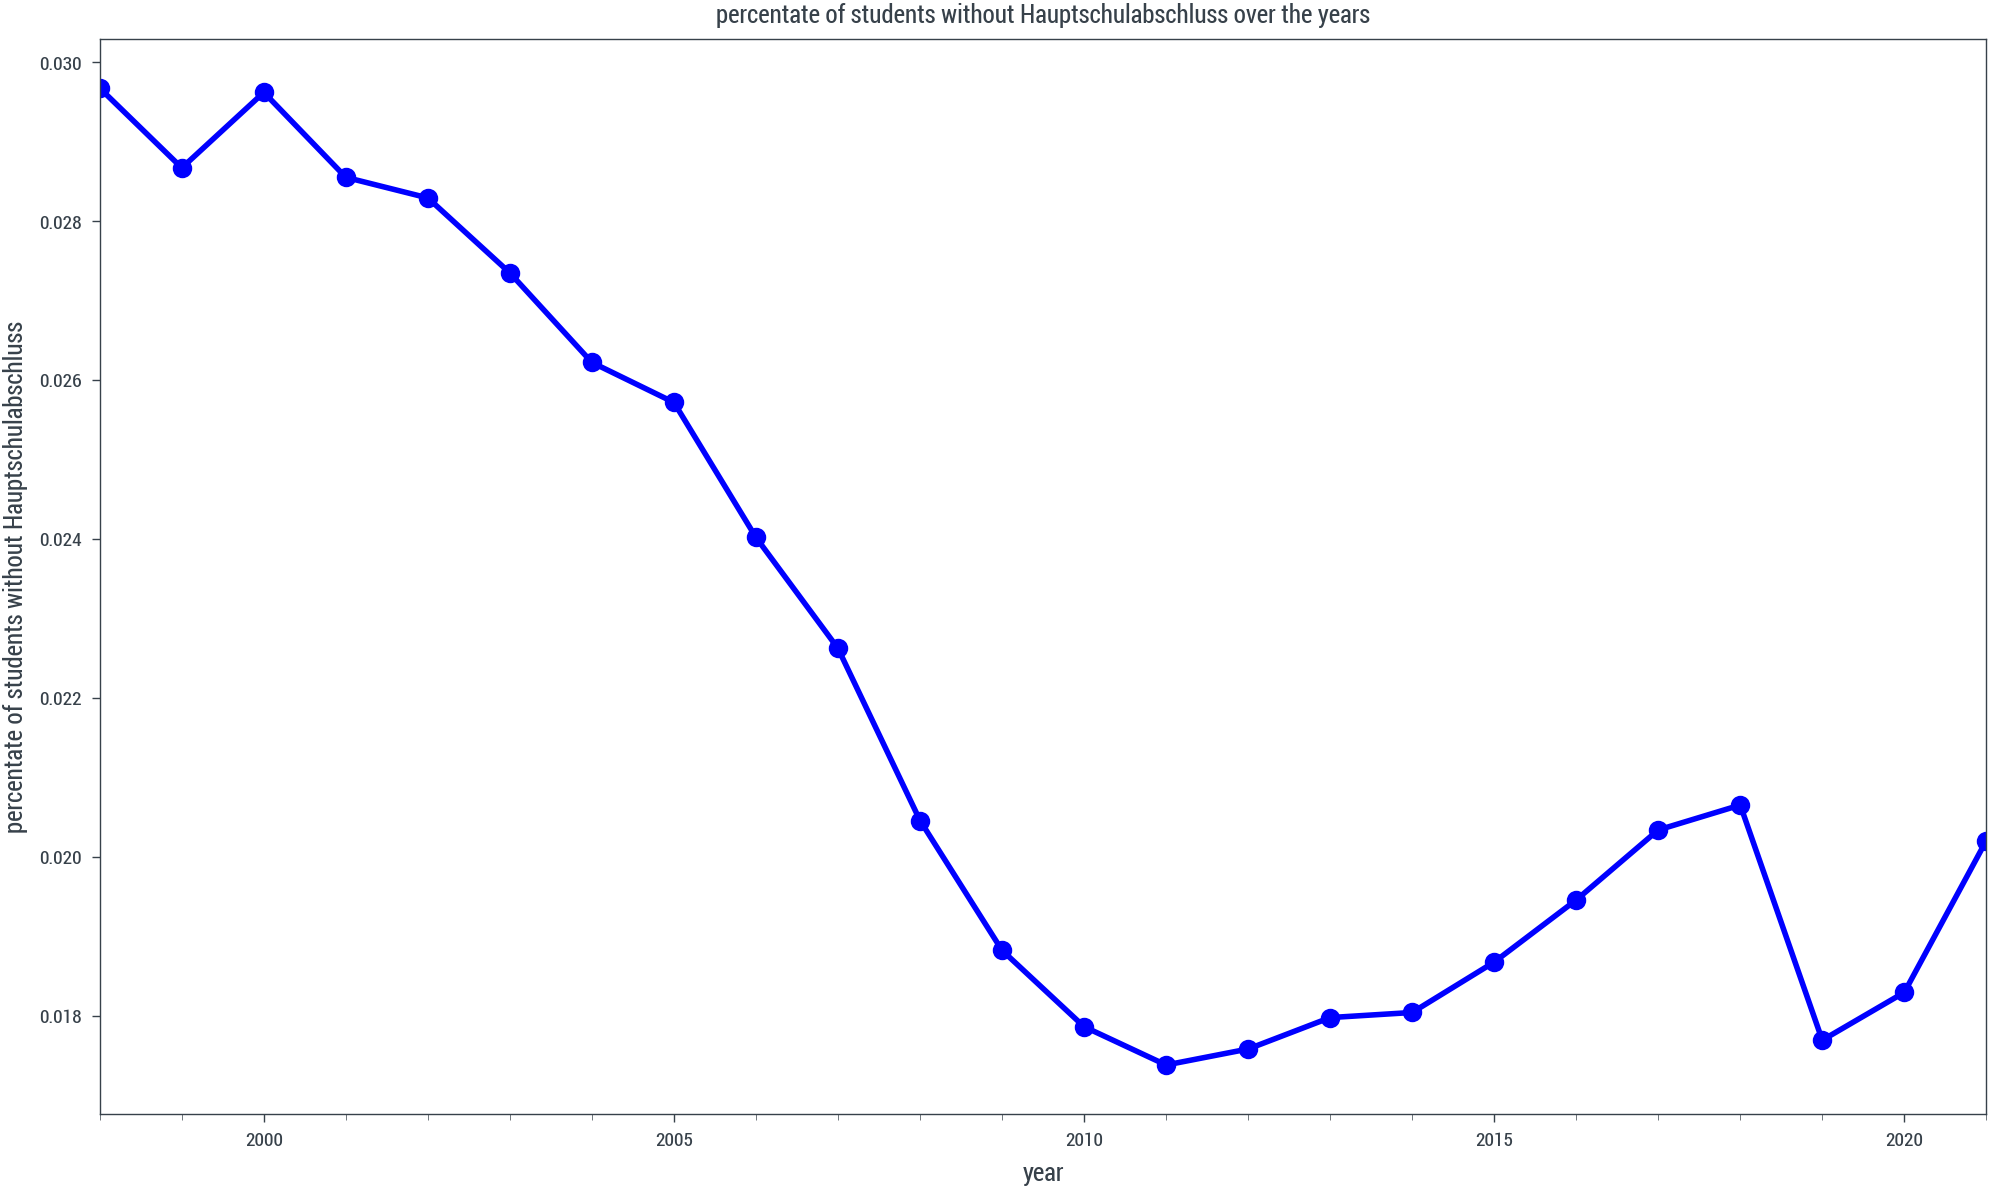

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
merged_df['relative'].plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('percentate of students without Hauptschulabschluss over the years')
plt.xlabel('year')
plt.ylabel('percentate of students without Hauptschulabschluss')
plt.show()